In [1]:
import pandas as pd
import pickle

infile = open('pickle','rb')
data = pickle.load(infile)
infile.close()
#data = pd.read_json("processed.json", orient='records',lines=True)
type(data)

pandas.core.frame.DataFrame

In [2]:
priorities = data.drop(['eventID','eventType','postID','postCategories','postText', 'processed_text', 'text'], axis=1)
#priorities = priorities.transpose()

In [3]:
low = []
medium = []
high = []
critical = []
        
for i in range(602, len(priorities['postPriority'])):
    row = priorities.iloc[i].tolist()
    if row[0] == "Low":
        low.append(row[1])
    elif row[0] == "Medium":
        medium.append(row[1])
    elif row[0] == "High":
        high.append(row[1])
    elif row[0] == "Critical":
        critical.append(row[1])

In [4]:
low_df = [item.tolist() for item in low]
med_df = [item.tolist() for item in medium]
h_df = [item.tolist() for item in high]
c_df = [item.tolist() for item in critical]

In [5]:
import random
from numpy import dot
from numpy.linalg import norm

dist_name = []


def critical_dist(lst1, lst2, dist_name):
    for i in range(100): #make this larger when done
        grp1 = random.choice(lst1)
        grp2 = random.choice(lst2)
        print(grp1, grp2)
        cos_sim = dot(grp1, grp2)/(norm(grp1)*norm(grp2))
        dist_name.append(cos_sim)
    return dist_name

In [6]:
ch_dist = []
ch = critical_dist(h_df, c_df, ch_dist)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[-0.572471559047699, -0.09385362267494202, -0.7312171459197998, -0.02405199222266674, 0.3827143609523773, -0.6790459156036377, 0.2983684837818146, -0.41886216402053833, -1.1792213916778564, -0.2936015725135803, 1.1443791389465332, -0.949883759021759, 0.5535747408866882, -0.21850872039794922, 0.19744674861431122, -0.30820807814598083, -0.1713525652885437, -0.4906598925590515, -0.42395439743995667, 1.5697083473205566, 0.8012179732322693, 0.33313408493995667, 0.2985594570636749, 1.017390489578247, -0.3702709972858429, -0.007109188009053469, -0.5922641158103943, 0.011713363230228424, -0.23022189736366272, -1.2363477945327759, 1.4586713314056396, 0.3220384120941162, 0.07901990413665771, 0.7972480058670044, -2.0594420433044434, -2.08272647857666, -0.6777772903442383, -0.17122039198875427, 0.7140210866928101, -0.09284839779138565, 0.307788610458374, 1.2953996658325195, -1.6270761489868164, 0.34717151522636414, -0.40285611152648926, 0.6146870851516724, -1.4805386066436768, -1.2979152202606201,

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics

def plt_dist(dist_name):
    mean = statistics.mean(dist_name)
    sd = statistics.stdev(dist_name)
    plt.plot(dist_name, norm.cdf(dist_name, mean, sd))
    plt.show() 

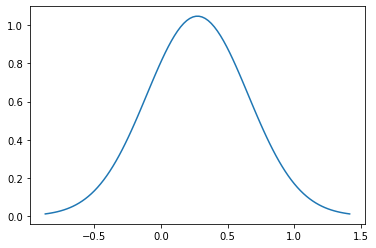

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = np.mean(ch)
variance = np.std(ch)
sigma = math.sqrt(variance)
ch = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(ch, stats.norm.pdf(ch, mu, sigma))
plt.show()

In [13]:
import seaborn as sns

sns.displot(ch)

AttributeError: module 'seaborn' has no attribute 'displot'